# Частина 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

## Завантаження даних

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train original shape (60000, 28, 28)
y_train original shape (60000,)


## Візуалізувати зображення з тренувального набору

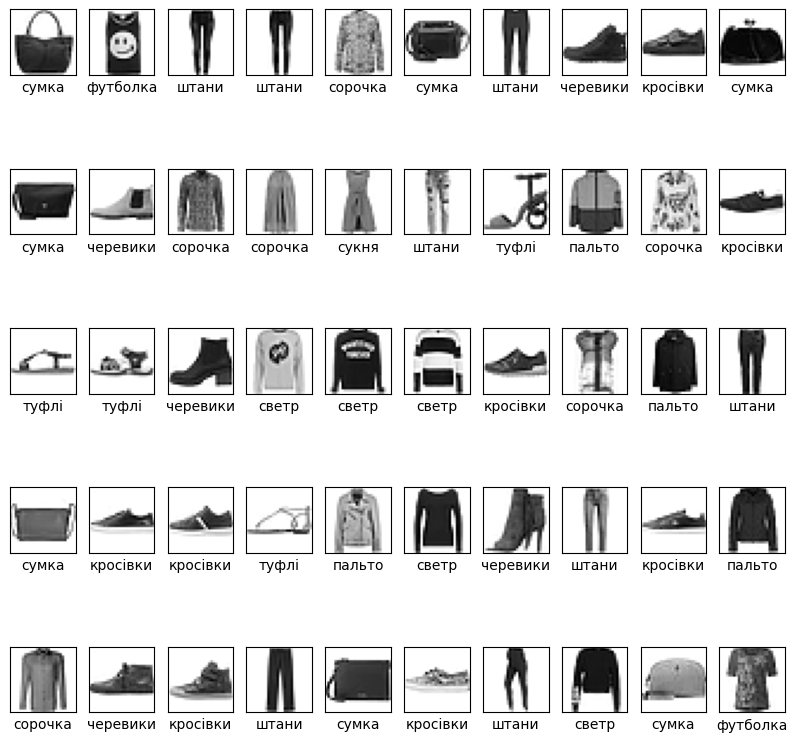

In [3]:
classes = ['футболка', 'штани', 'светр', 'cукня', 'пальто', 'туфлі', 'сорочка', 'кросівки', 'сумка', 'черевики']

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

## Нормалізація

In [16]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Number of train data -", len(x_train))
print("Number of test data -", len(x_test))

Number of train data - 55000
Number of test data - 10000


In [5]:
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

y_train = utils.to_categorical(y_train, 10)
y_valid = utils.to_categorical(y_valid, 10)
y_test = utils.to_categorical(y_test, 10)

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [7]:
model = models.Sequential([
      layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=2),
      layers.Dropout(0.3),
      layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'),
      layers.MaxPooling2D(pool_size=2),
      layers.Dropout(0.3),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 32)         

## Тренування нейронної мережі

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10


860/860 [==============================] - ETA: 0s - loss: 0.6175 - accuracy: 0.7712
Epoch 1: val_loss improved from inf to 0.38044, saving model to model.weights.best.hdf5
860/860 [==============================] - 48s 54ms/step - loss: 0.6175 - accuracy: 0.7712 - val_loss: 0.3804 - val_accuracy: 0.8640
Epoch 2/10
  1/860 [..............................] - ETA: 1:05 - loss: 0.3426 - accuracy: 0.8906

C:\Users\sasha\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


859/860 [============================>.] - ETA: 0s - loss: 0.4281 - accuracy: 0.8435
Epoch 2: val_loss improved from 0.38044 to 0.32874, saving model to model.weights.best.hdf5
860/860 [==============================] - 49s 57ms/step - loss: 0.4281 - accuracy: 0.8435 - val_loss: 0.3287 - val_accuracy: 0.8820
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3834 - accuracy: 0.8597
Epoch 3: val_loss improved from 0.32874 to 0.30672, saving model to model.weights.best.hdf5
860/860 [==============================] - 44s 51ms/step - loss: 0.3833 - accuracy: 0.8597 - val_loss: 0.3067 - val_accuracy: 0.8858
Epoch 4/10
859/860 [============================>.] - ETA: 0s - loss: 0.3522 - accuracy: 0.8709
Epoch 4: val_loss improved from 0.30672 to 0.29841, saving model to model.weights.best.hdf5
860/860 [==============================] - 44s 51ms/step - loss: 0.3522 - accuracy: 0.8709 - val_loss: 0.2984 - val_accuracy: 0.8866
Epoch 5/10
859/860 [============================

In [11]:
model.load_weights('model.weights.best.hdf5')

score = model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test accuracy:', round(score[1], 3))


 Test accuracy: 0.908


## Результат

313/313 [==============================] - 3s 7ms/step


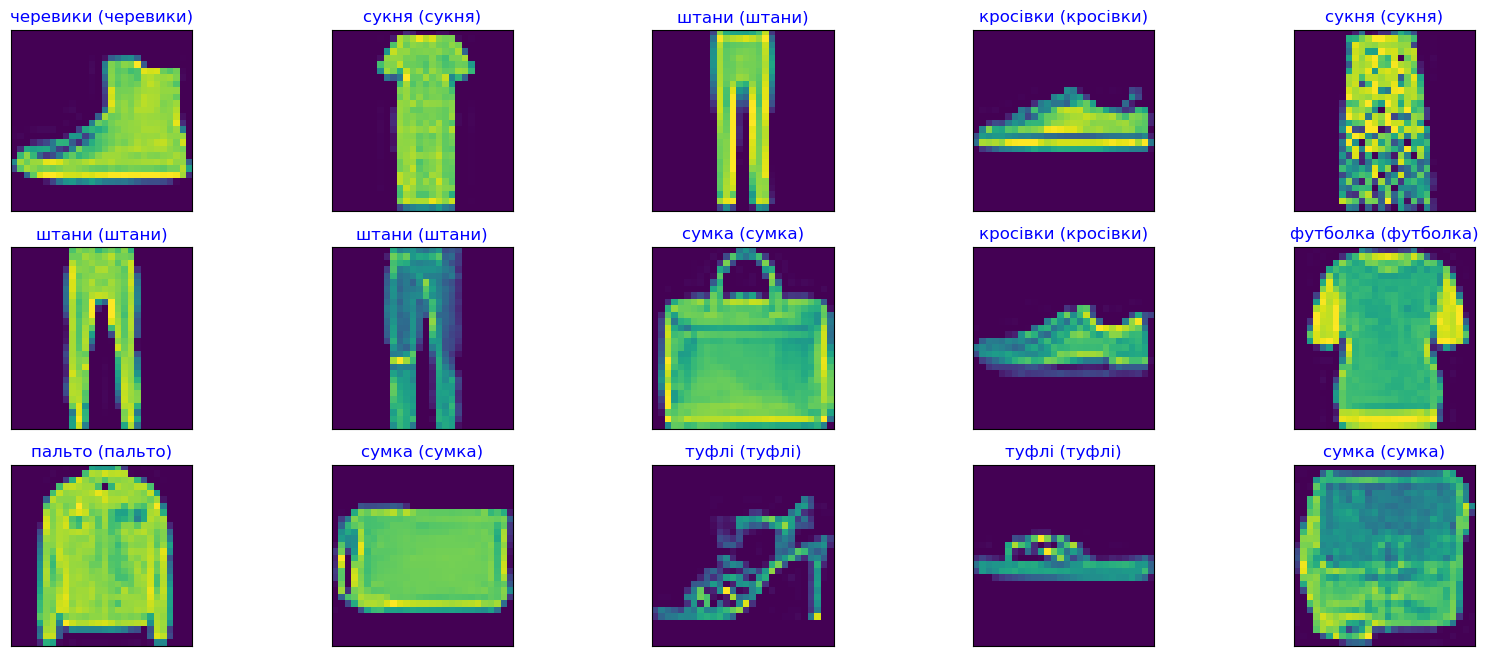

In [12]:
y_hat = model.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
   
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
   
    ax.set_title("{} ({})".format(classes[predict_index], 
                                  classes[true_index]),
                                  color=("blue" if predict_index == true_index else "red"))

# Частина 2

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import utils
from keras.preprocessing.image import img_to_array
from keras import layers
from keras import models
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split

## Базова модель VGG16

In [18]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 92s 2us/step


## Завантаження та форматвіння даних для моделі

In [19]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

y_train = utils.to_categorical(y_train)
y_test =utils.to_categorical(y_test)

x_train=np.reshape(x_train, (-1,28,28,1))
x_test=np.reshape(x_test, (-1,28,28,1))

x_train = Concatenate()([x_train,x_train,x_train])
x_test = Concatenate()([x_test,x_test,x_test])

x_train.shape

TensorShape([60000, 28, 28, 3])

In [22]:
resized_x_train = tf.image.resize(x_train, (32,32))
resized_x_test = tf.image.resize(x_test, (32,32))

resized_x_train.shape, x_train.shape

(TensorShape([60000, 32, 32, 3]), TensorShape([60000, 28, 28, 3]))

In [24]:
train_X = np.asarray([img_to_array(im) for im in resized_x_train])
test_X = np.asarray([img_to_array(im) for im in resized_x_test])

In [26]:
x_train,x_val,y_train,y_val = train_test_split(train_X, y_train, test_size=0.2, random_state=13)

## Тренувальних і валідаційних даних 

In [28]:
train_generator = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

test_generator = ImageDataGenerator(rescale=1./255)

train_generator.fit(x_train)
test_generator.fit(x_val)

train_generator = train_generator.flow(x_train,y_train,batch_size=200)
test_generator = test_generator.flow(x_val,y_val,batch_size=200)

x_test.shape

TensorShape([10000, 28, 28, 3])

In [29]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [31]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

## Створення моделі нейронної мережі

In [32]:
original_dim = (32, 32, 3)
target_size = (150, 150)

model = models.Sequential()
model.add(layers.Input(original_dim))
model.add(layers.Lambda(lambda image: tf.image.resize(image, target_size)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 150, 150, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_6 (Dropout)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 10)               

In [34]:
checkpointer = ModelCheckpoint(filepath='best_weights.hdf5',verbose=1, save_best_only= True)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(1e-4),
              metrics=['acc'])

history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=100,
                    validation_data=test_generator,
                    validation_steps=60,
                    shuffle=True,
                    callbacks=[checkpointer])

Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 1.1291 - acc: 0.5814  
Epoch 1: val_loss improved from inf to 0.68462, saving model to best_weights.hdf5


C:\Users\sasha\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 7573s 76s/step - loss: 1.1291 - acc: 0.5814 - val_loss: 0.6846 - val_acc: 0.7341
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 0.6006 - acc: 0.7754  
Epoch 2: val_loss improved from 0.68462 to 0.45947, saving model to best_weights.hdf5
100/100 [==============================] - 7507s 75s/step - loss: 0.6006 - acc: 0.7754 - val_loss: 0.4595 - val_acc: 0.8204
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 0.5012 - acc: 0.8160  
Epoch 3: val_loss improved from 0.45947 to 0.33641, saving model to best_weights.hdf5
100/100 [==============================] - 7602s 76s/step - loss: 0.5012 - acc: 0.8160 - val_loss: 0.3364 - val_acc: 0.8781
Epoch 4/10
100/100 [==============================] - ETA: 0s - loss: 0.4405 - acc: 0.8377  
Epoch 4: val_loss improved from 0.33641 to 0.32050, saving model to best_weights.hdf5
100/100 [==============================] - 7480s 75s/step - loss: 0.4405 - acc: 0.8377 - va

## Графік точності навчання та валідації протягом епох тренування

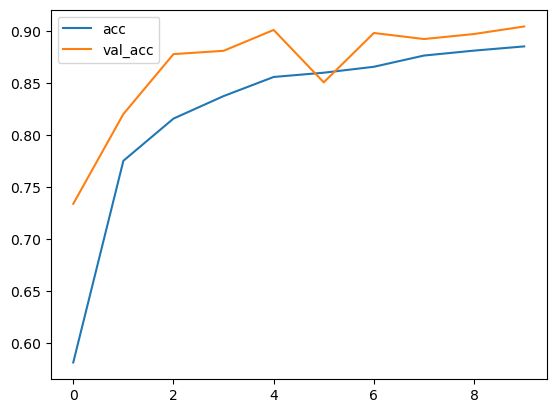

In [37]:
plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.legend()

## Графік втрат тренування та валідації протягом епох тренування

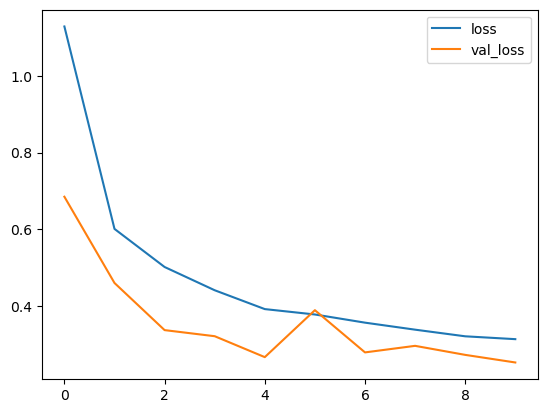

In [38]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

In [39]:
x_test = tf.image.resize(x_test,(150,150))

test_generator = ImageDataGenerator(rescale=1./255)
test_generator.fit(x_test)
test_generator = test_generator.flow(x_test, y_test, batch_size=200)
test_loss, test_acc = model.evaluate(test_generator, steps=50)

print('test acc:', test_acc)

50/50 [==============================] - 1037s 21s/step - loss: 0.3172 - acc: 0.8810
test acc: 0.8809999823570251


In [40]:
model = keras.models.load_model('best_weights.hdf5')

test_generator = ImageDataGenerator(rescale=1./255)
test_generator.fit(x_test)
test_generator = test_generator.flow(x_test, y_test, batch_size=200)
test_loss, test_acc = model.evaluate(test_generator, steps=50)

print('test acc:', test_acc)

50/50 [==============================] - 1074s 21s/step - loss: 0.3172 - acc: 0.8810
test acc: 0.8809999823570251
